In [9]:
!pip install keras-tuner

In [11]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()

    # Hyperparameters
    max_conv_layers = 5
    max_dense_layers = 5
    max_filters_neurons = 256
    max_lr = 0.001

    # Tune number of convolutional layers
    num_conv_layers = hp.Int('num_conv_layers', 1, max_conv_layers)

    # Add convolutional layers
    for i in range(num_conv_layers):
        filters = hp.Int(f'conv_{i}_filters', 32, max_filters_neurons, step=32)
        model.add(keras.layers.Conv2D(filters, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(keras.layers.MaxPooling2D((2, 2)))

    model.add(keras.layers.Flatten())

    # Tune number of dense layers
    num_dense_layers = hp.Int('num_dense_layers', 1, max_dense_layers)

    # Add dense layers
    for i in range(num_dense_layers):
        neurons = hp.Int(f'dense_{i}_neurons', 32, max_filters_neurons, step=32)
        model.add(keras.layers.Dense(neurons, activation='relu'))

    model.add(keras.layers.Dense(10, activation='softmax'))

    # Tune learning rate
    lr = hp.Choice('learning_rate', [max_lr])

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Define the Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='convolutional_tuner'
)

# Get the data (for example MNIST dataset)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

# Start the Keras Tuner search for best hyperparameters
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Summary of the best model
best_model.summary()


Trial 5 Complete [01h 01m 29s]
val_accuracy: 0.9915000200271606

Best val_accuracy So Far: 0.9915000200271606
Total elapsed time: 02h 24m 00s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 256)       2560      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       590080    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 256)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6400)     

In [17]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
# Get the number of convolutional layers and dense layers
num_conv_layers = best_hyperparameters.get('num_conv_layers')
num_dense_layers = best_hyperparameters.get('num_dense_layers')

# Display the number of filters for each convolutional layer
print("Number of Filters for Each Convolutional Layer:")
print("==============================================")
for i in range(num_conv_layers):
    filters = best_hyperparameters.get(f'conv_{i}_filters')
    print(f"Convolutional Layer {i + 1}: {filters} filters")

# Display the number of neurons for each dense layer
print("\nNumber of Neurons for Each Dense Layer:")
print("=======================================")
for i in range(num_dense_layers):
    neurons = best_hyperparameters.get(f'dense_{i}_neurons')
    print(f"Dense Layer {i + 1}: {neurons} neurons")

print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")

Number of Filters for Each Convolutional Layer:
Convolutional Layer 1: 256 filters
Convolutional Layer 2: 256 filters

Number of Neurons for Each Dense Layer:
Dense Layer 1: 64 neurons
Dense Layer 2: 224 neurons
Dense Layer 3: 96 neurons
Dense Layer 4: 192 neurons
Dense Layer 5: 64 neurons
Learning Rate: 0.001


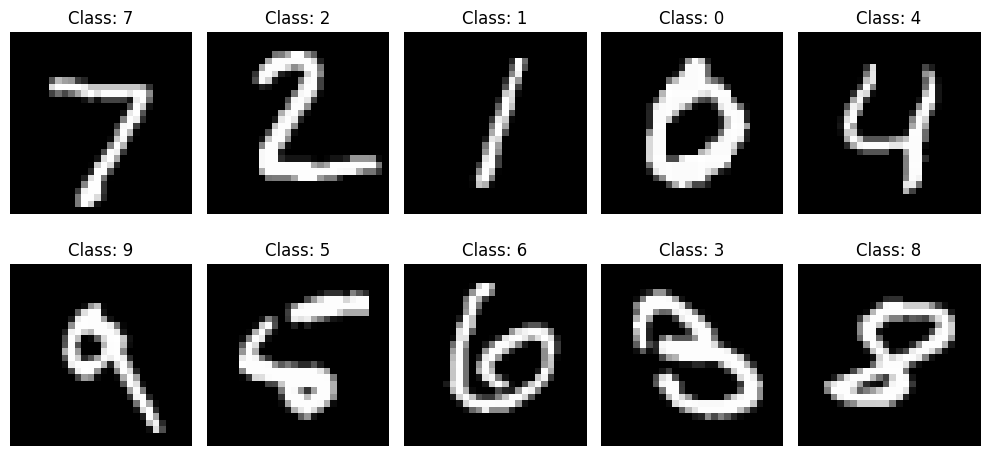

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load the MNIST dataset
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Create a dictionary to store one image per class
class_images = {}

# Loop through the dataset to find one image per class
for i in range(len(x_test)):
    label = y_test[i]
    if label not in class_images:
        class_images[label] = x_test[i]
        if len(class_images) == 10:  # Found one image per class
            break

# Display one image per class
plt.figure(figsize=(10, 5))
for i, (label, image) in enumerate(class_images.items()):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Class: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
